<a href="https://colab.research.google.com/github/salshafir/ailo/blob/main/News_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install contractions
import warnings
warnings.filterwarnings('ignore')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 6.3 MB/s eta 0:00:00


## EDA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import spacy
# from plotly.offline import iplot
# import plotly.express as px

**pembacaan data**

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/salshafir/ailo/main/News-sentime.csv', encoding='latin-1', header=None)
data.columns = ["Sentiment", "News Headline"]
data.head()

,Sentiment,News Headline
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


**describe data**

In [ ]:
data.describe(include = "all")

,Sentiment,News Headline
count,4846,4846
unique,3,4838
top,neutral,TELECOMWORLDWIRE-7 April 2006-TJ Group Plc sel...
freq,2879,2


In [ ]:
data = data.drop_duplicates()
print(data.head())
print(data.shape)

  Sentiment                                      News Headline
0   neutral  According to Gran , the company has no plans t...
1   neutral  Technopolis plans to develop in stages an area...
2  negative  The international electronic industry company ...
3  positive  With the new production plant the company woul...
4  positive  According to the company 's updated strategy f...
(4840, 2)


**number of character**

Text(0.5, 1.0, 'Number of Character')

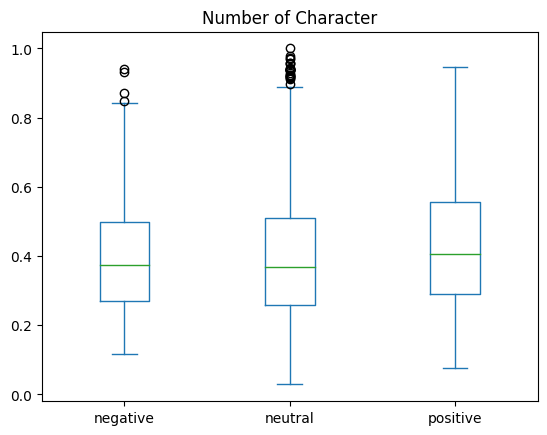

In [ ]:
import plotly.offline as pyo
pyo.init_notebook_mode(connected=True)

data['nr_of_char'] = data['News Headline'].str.len()
data['nr_of_char'] = data['nr_of_char'] / data['nr_of_char'].max()
data[['Sentiment', 'nr_of_char']].pivot(columns='Sentiment', values='nr_of_char').plot(kind='box')
plt.title("Number of Character")

**number of words**

<Axes: >

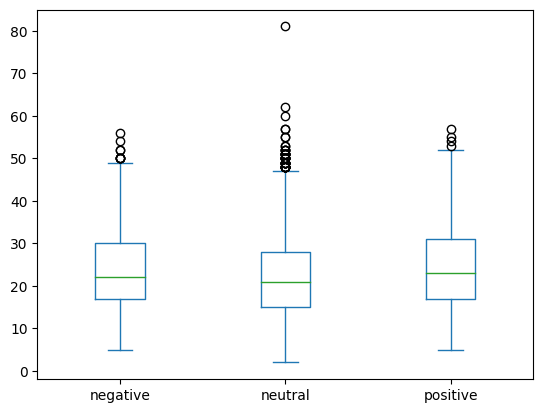

In [ ]:
data['nr_of_words'] = data['News Headline'].str.split().str.len()
data[['Sentiment', 'nr_of_words']].pivot(columns='Sentiment', values='nr_of_words').plot(kind='box')

**number of unique words**

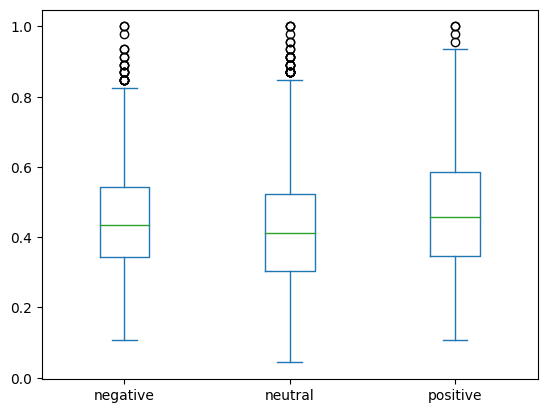

In [ ]:
data['nr_of_unique_words'] = data['News Headline'].apply(lambda x: len(set(x.split())))
data['nr_of_unique_words'] = data['nr_of_unique_words'] / data['nr_of_unique_words'].max()
data[['Sentiment', 'nr_of_unique_words']].pivot(columns='Sentiment', values='nr_of_unique_words').plot(kind='box')
plt.show()

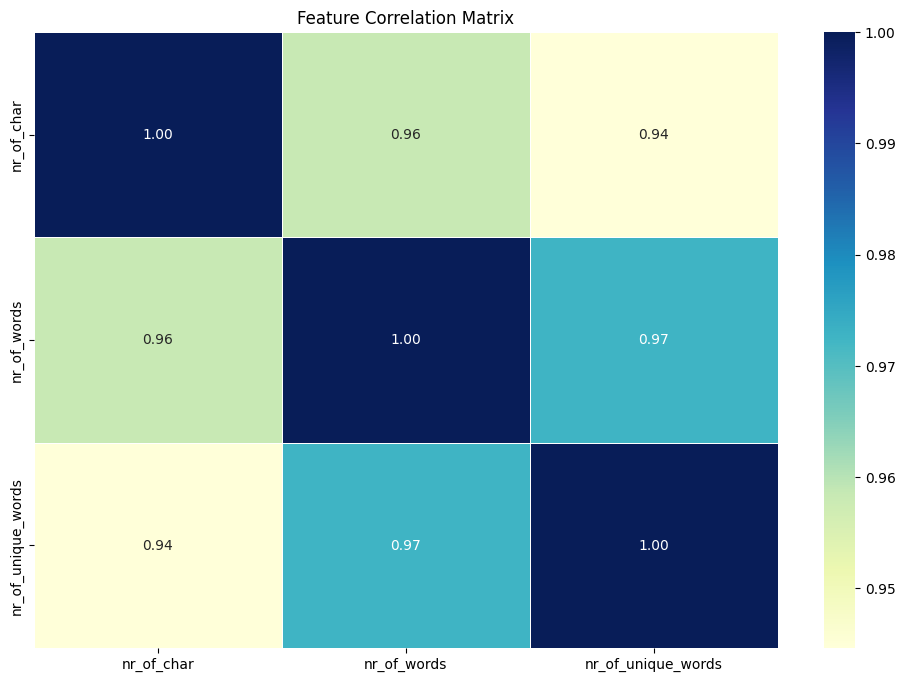

In [ ]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

numeric_data = data.select_dtypes(include='number')
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=.5)
plt.title("Feature Correlation Matrix")
plt.show()


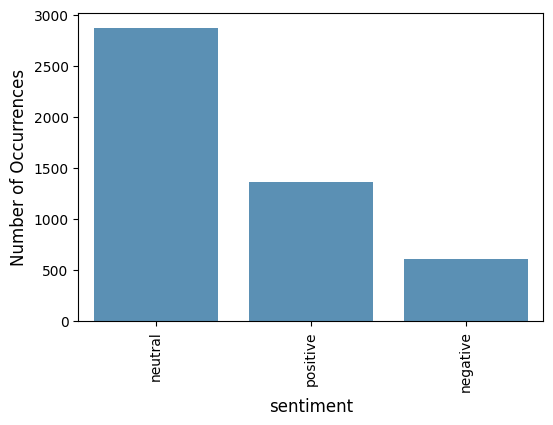

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt

sentiment = data['Sentiment'].value_counts()
plt.figure(figsize=(6,4))
sns.barplot(x=sentiment.index, y=sentiment.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('sentiment', fontsize=12)
plt.xticks(rotation=90)
plt.show();

In [ ]:
from sklearn.utils import resample

# Separate classes in the dataset
data_neutral = data[data['Sentiment'] == "neutral"]
data_negative = data[data['Sentiment'] == "negative"]
data_positive = data[data['Sentiment'] == "positive"]

print("Before Upsampling\n", data['Sentiment'].value_counts(), sep="")

# Upsample minority classes to match the majority (neutral) class
data_negative_upsampled = resample(data_negative,
                                 replace=True,
                                 n_samples=data_neutral.shape[0],
                                 random_state=123)

data_positive_upsampled = resample(data_positive,
                                 replace=True,
                                 n_samples=data_neutral.shape[0],
                                 random_state=123)

# Concatenate all classes after upsampling
df_balance = pd.concat([data_neutral, data_negative_upsampled, data_positive_upsampled])

print("After upsampling\n", df_balance['Sentiment'].value_counts(), sep="")

data = df_balance


Before Upsampling
Sentiment
neutral     2873
positive    1363
negative     604
Name: count, dtype: int64
After upsampling
Sentiment
neutral     2873
negative    2873
positive    2873
Name: count, dtype: int64


**Sentiment distribution**

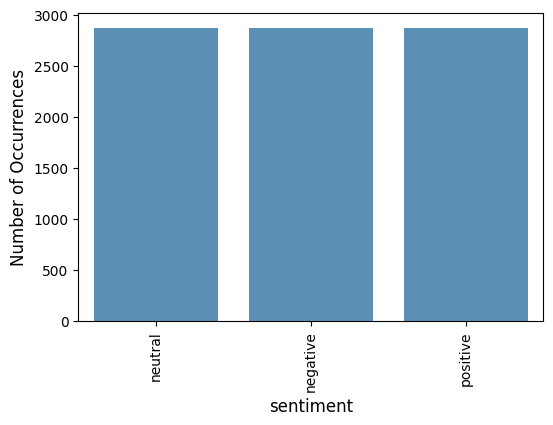

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt

sentiment = data['Sentiment'].value_counts()
plt.figure(figsize=(6,4))
sns.barplot(x=sentiment.index, y=sentiment.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('sentiment', fontsize=12)
plt.xticks(rotation=90)
plt.show();

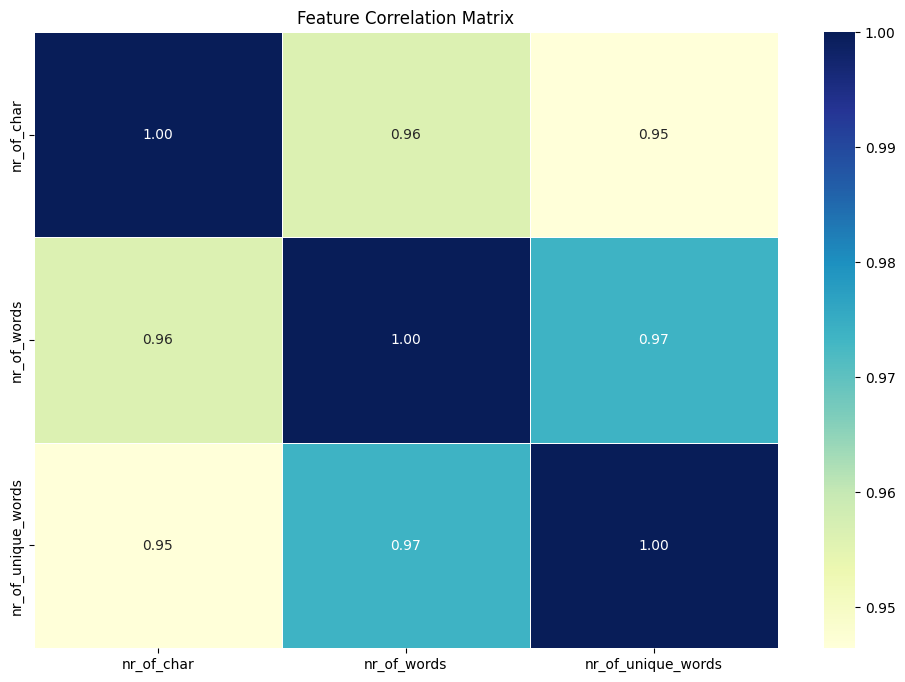

In [ ]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

numeric_data = data.select_dtypes(include='number')
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=.5)
plt.title("Feature Correlation Matrix")
plt.show()


**Word Cloud**

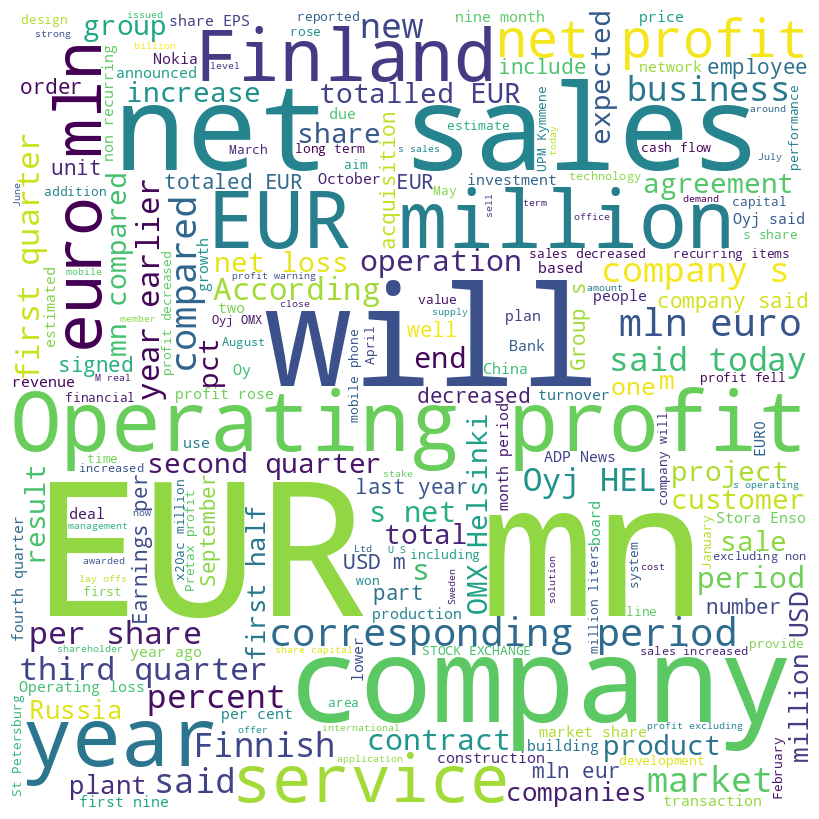

In [ ]:
from wordcloud import WordCloud

# Joining text data from the 'full_text' column in the DataFrame
text = ' '.join(data['News Headline'])

# Create a WordCloud object and generate the word cloud
wordcloud = WordCloud(width=800, height=800,
                      background_color='white',
                      max_words=200,
                      colormap='viridis',
                      contour_color='black',
                      contour_width=1).generate(text)

# Display the WordCloud using Matplotlib
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

# Show the generated WordCloud
plt.show()


## Preprocessing

In [ ]:
import re
import nltk
import tqdm
import unicodedata
import contractions
from bs4 import BeautifulSoup
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Menghilangkan tag HTML
def strip_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    [s.extract() for s in soup(['iframe', 'script'])]
    stripped_text = soup.get_text()
    stripped_text = re.sub(r'[\r|\n|\r\n]+', '\n', stripped_text)
    return stripped_text

data['No HTML'] = data['News Headline'].apply(strip_html_tags)
data[['News Headline', 'No HTML']].head()

,News Headline,No HTML
0,"According to Gran , the company has no plans t...","According to Gran , the company has no plans t..."
1,Technopolis plans to develop in stages an area...,Technopolis plans to develop in stages an area...
58,At the request of Finnish media company Alma M...,At the request of Finnish media company Alma M...
59,"In Sweden , Gallerix accumulated SEK denominat...","In Sweden , Gallerix accumulated SEK denominat..."
60,The company supports its global customers in d...,The company supports its global customers in d...


In [ ]:
data.drop('No HTML', axis=1, inplace=True)

In [ ]:
# Menghapus karakter aksen
def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

data['No accented'] = data['News Headline'].apply(remove_accented_chars)
data[['News Headline', 'No accented']].head()

,News Headline,No accented
0,"According to Gran , the company has no plans t...","According to Gran , the company has no plans t..."
1,Technopolis plans to develop in stages an area...,Technopolis plans to develop in stages an area...
58,At the request of Finnish media company Alma M...,At the request of Finnish media company Alma M...
59,"In Sweden , Gallerix accumulated SEK denominat...","In Sweden , Gallerix accumulated SEK denominat..."
60,The company supports its global customers in d...,The company supports its global customers in d...


In [ ]:
data.drop('No accented', axis=1, inplace=True)

In [ ]:
# data.head()

In [ ]:
# Menghapus stopwords
def stopwords_removal(words):
    list_stopwords = nltk.corpus.stopwords.words('english')
    return [word for word in words if word not in list_stopwords]

# Fungsi untuk text preprocessing
def pre_process_corpus(docs):
    norm_docs = []
    for doc in tqdm.tqdm(docs):
        doc = doc.lower()
        doc = strip_html_tags(doc)
        doc = doc.translate(doc.maketrans("\n\t\r", "   "))
        doc = remove_accented_chars(doc)
        doc = contractions.fix(doc)
        doc = re.sub(r'[^a-zA-Z0-9\s%-]', '', doc, re.I|re.A)
        doc = re.sub(' +', ' ', doc)
        doc = doc.strip()
        doc = word_tokenize(doc)
        doc = stopwords_removal(doc)
        norm_docs.append(doc)

    norm_docs = [" ".join(word) for word in norm_docs]
    return norm_docs

data['News Headline'] = pre_process_corpus(data['News Headline'])
# data['Text Prepro'] = data['News Headline'].apply(remove_accented_chars)
# data[['News Headline', 'Text Prepro']].head()


100%|██████████| 8619/8619 [00:04<00:00, 1752.68it/s]


In [ ]:
data.head()

,Sentiment,News Headline,nr_of_char,nr_of_words,nr_of_unique_words
0,neutral,according gran company plans move production r...,0.403175,25,0.413043
1,neutral,technopolis plans develop stages area less 100...,0.603175,31,0.608696
58,neutral,request finnish media company alma media newsp...,0.920635,50,0.869565
59,neutral,sweden gallerix accumulated sek denominated sa...,0.346032,21,0.369565
60,neutral,company supports global customers developing n...,0.511111,24,0.500000


## Model


In [ ]:
from sklearn.model_selection import train_test_split

x = data['News Headline']
y = data['Sentiment']
label = data['Sentiment'].unique()

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, train_size=0.8)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
x_trainVectorized = vectorizer.fit_transform(x_train)
x_valVectorized  = vectorizer.transform(x_val)
x_testVectorized  = vectorizer.transform(x_test)

**Train Model**



- **Linear Model**: Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

parametersLR = {
    "C":np.logspace(-3,3,7),
    "penalty":["l1","l2"]
    }

modelLR = LogisticRegression()
modelLR = GridSearchCV(modelLR, parametersLR, cv=10)
modelLR.fit(x_trainVectorized, y_train)


print("Best Parameters", modelLR.best_params_)

Best Parameters {'C': 10.0, 'penalty': 'l2'}


- **Ensemble Model**: Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

modelRF = RandomForestClassifier().fit(x_trainVectorized, y_train)

- **Neural Network**: LTSM

In [ ]:
from keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

y_train_encoded = to_categorical(LabelEncoder().fit_transform(y_train))
y_val_encoded = to_categorical(LabelEncoder().fit_transform(y_val))
y_test_encoded = to_categorical(LabelEncoder().fit_transform(y_test))

num_words = 12000
tokenizer=Tokenizer(num_words,lower=True)
df_total = pd.concat([pd.Series(x_train), pd.Series(x_test)], axis = 0)
tokenizer.fit_on_texts(df_total)

In [ ]:
from keras.preprocessing.sequence import pad_sequences

X_train_ = tokenizer.texts_to_sequences(x_train)
X_train_pad = pad_sequences(X_train_, maxlen=81, padding='post')

X_test_ = tokenizer.texts_to_sequences(x_test)
X_test_pad = pad_sequences(X_test_, maxlen=81, padding='post')

X_val_ = tokenizer.texts_to_sequences(x_val)
X_val_pad = pad_sequences(X_val_, maxlen=81, padding='post')


In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dropout, Bidirectional, Dense, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint

lstm = Sequential()
lstm.add(Embedding(input_dim=num_words, output_dim=100, input_length=X_train_pad.shape[1]))
lstm.add(Dropout(0.4))

lstm.add(Bidirectional(LSTM(128, return_sequences=True)))
lstm.add(Dropout(0.3))

lstm.add(Bidirectional(LSTM(128, return_sequences=False)))
lstm.add(Dense(64, activation='relu'))
lstm.add(BatchNormalization())
lstm.add(Dense(3, activation='softmax'))

optimizer = Adam(learning_rate=0.001)

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('./model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

lstm.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

model_history = lstm.fit(X_train_pad, y_train_encoded, epochs=50, batch_size=64, validation_data=(X_val_pad, y_val_encoded), callbacks=[es, mc])


Epoch 1/50
87/87 [==============================] - ETA: 0s - loss: 0.7356 - accuracy: 0.6603
Epoch 1: val_accuracy improved from -inf to 0.83031, saving model to ./model.h5
87/87 [==============================] - 84s 868ms/step - loss: 0.7356 - accuracy: 0.6603 - val_loss: 0.9091 - val_accuracy: 0.8303
Epoch 2/50
87/87 [==============================] - ETA: 0s - loss: 0.2516 - accuracy: 0.9094
Epoch 2: val_accuracy did not improve from 0.83031
87/87 [==============================] - 77s 885ms/step - loss: 0.2516 - accuracy: 0.9094 - val_loss: 0.8632 - val_accuracy: 0.4685
Epoch 3/50
87/87 [==============================] - ETA: 0s - loss: 0.1133 - accuracy: 0.9630
Epoch 3: val_accuracy did not improve from 0.83031
87/87 [==============================] - 79s 911ms/step - loss: 0.1133 - accuracy: 0.9630 - val_loss: 0.6204 - val_accuracy: 0.7252
Epoch 4/50
87/87 [==============================] - ETA: 0s - loss: 0.0762 - accuracy: 0.9755
Epoch 4: val_accuracy improved from 0.83031 to

## Evaluation and Analysis

In [ ]:
from keras.models import load_model
from sklearn.metrics import classification_report

y_predRFTest = modelRF.predict(x_testVectorized)
y_predLRTest = modelLR.predict(x_testVectorized)


# Traditional Machine Learning
print("Logistic Regression Model")
print("Classification Report:\nTest Set\n", classification_report(y_test, y_predLRTest, digits=4))

print("Random Forest Model")
print("Classification Report:\nTest Set\n", classification_report(y_test, y_predRFTest, digits=4))


# Neural Network
modelLTSM = load_model('model.h5')

y_predLTSMTest = modelLTSM.predict(X_test_pad)
y_pred_indices = y_predLTSMTest.argmax(axis=1)
y_true_indices = y_test_encoded.argmax(axis=1)

label_mapping = {0: 'neutral', 1: 'positive', 2: 'negative'}

y_pred_labels = [label_mapping[idx] for idx in y_pred_indices]
y_true_labels = [label_mapping[idx] for idx in y_true_indices]

print("LTSM Model")
print("Classification Report:\nTest Set\n", classification_report(y_true_labels, y_pred_labels, digits=4))



Logistic Regression Model
Classification Report:
Test Set
               precision    recall  f1-score   support

    negative     0.9232    0.9860    0.9536       573
     neutral     0.8764    0.7882    0.8300       576
    positive     0.8468    0.8748    0.8606       575

    accuracy                         0.8828      1724
   macro avg     0.8822    0.8830    0.8814      1724
weighted avg     0.8821    0.8828    0.8813      1724

Random Forest Model
Classification Report:
Test Set
               precision    recall  f1-score   support

    negative     0.9606    0.9791    0.9697       573
     neutral     0.8691    0.8993    0.8840       576
    positive     0.9154    0.8661    0.8901       575

    accuracy                         0.9147      1724
   macro avg     0.9151    0.9148    0.9146      1724
weighted avg     0.9150    0.9147    0.9145      1724

54/54 [==============================] - 11s 174ms/step
LTSM Model
Classification Report:
Test Set
               precision   

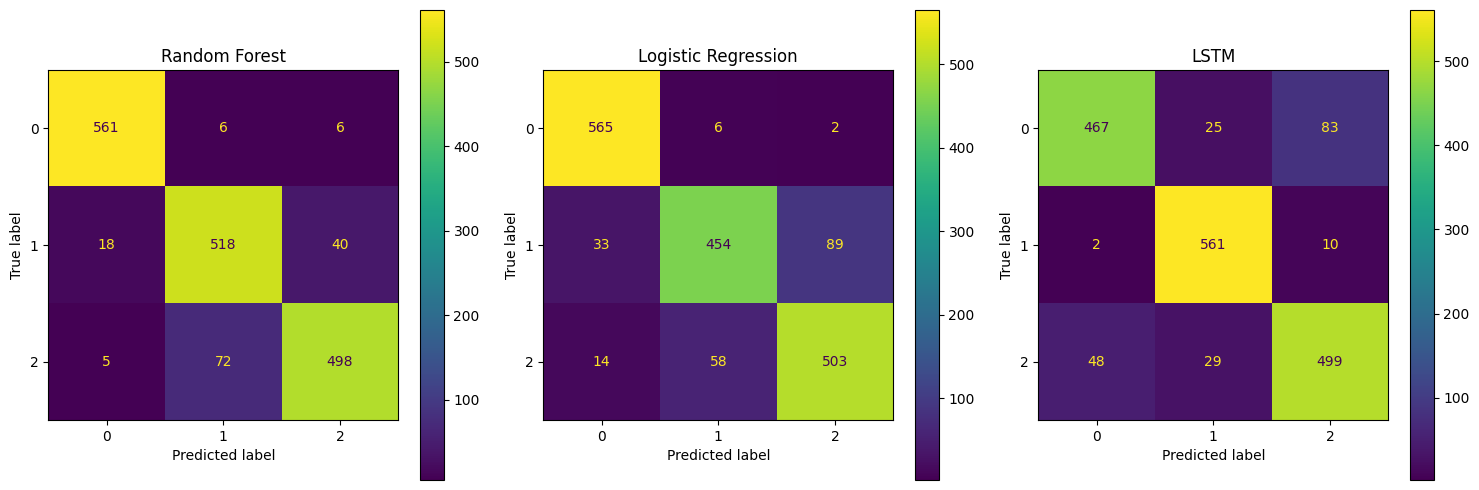

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_RF = confusion_matrix(y_test, y_predRFTest)
cm_LR = confusion_matrix(y_test, y_predLRTest)
cm_LTSM = confusion_matrix(y_true_labels, y_pred_labels)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot Random Forest confusion matrix
disp_RF = ConfusionMatrixDisplay(confusion_matrix=cm_RF)
disp_RF.plot(ax=axs[0])
axs[0].set_title('Random Forest')

# Plot Logistic Regression confusion matrix
disp_LR = ConfusionMatrixDisplay(confusion_matrix=cm_LR)
disp_LR.plot(ax=axs[1])
axs[1].set_title('Logistic Regression')

# Plot LSTM confusion matrix
disp_LTSM = ConfusionMatrixDisplay(confusion_matrix=cm_LTSM)
disp_LTSM.plot(ax=axs[2])
axs[2].set_title('LSTM')

plt.tight_layout()
plt.show()

In [ ]:
def check_input_class(user_input):
    user_input_vectorized = vectorizer.transform([user_input])

    y_predLR = modelLR.predict(user_input_vectorized)
    y_predRF = modelRF.predict(user_input_vectorized)

    user_input_sequence = tokenizer.texts_to_sequences([user_input])
    user_input_padded = pad_sequences(user_input_sequence, maxlen=81, padding='post')

    y_predLTSM = modelLTSM.predict(user_input_padded)
    y_pred_indices = y_predLTSM.argmax(axis=1)

    label_mapping = {0: 'negative', 1: 'neutral', 2: 'positive'}
    ltsm_prediction = label_mapping[y_pred_indices[0]]

    print(user_input)
    print("Logistic Regression Model Prediction:", y_predLR[0])
    print("Random Forest Model Prediction:", y_predRF[0])
    print("LTSM Model Prediction:", ltsm_prediction)
    print("\n")



# Example Positive
example_text1 = "The company reported record-breaking profits this quarter, surpassing all analyst expectations. Investors are ecstatic about the robust financial performance, leading to a surge in stock prices."
# Example Neutral
example_text2 = "The Central Bank announced its decision to keep the interest rates unchanged, signaling stability in the financial markets."
# Example Negative
example_text3 = "The economic downturn has resulted in massive layoffs across various industries. Many businesses are struggling to stay afloat amidst declining consumer spending and market uncertainties. Investors are cautious about the market outlook."


check_input_class(example_text1)
check_input_class(example_text2)
check_input_class(example_text3)

1/1 [==============================] - 0s 56ms/step
The company reported record-breaking profits this quarter, surpassing all analyst expectations. Investors are ecstatic about the robust financial performance, leading to a surge in stock prices.
Logistic Regression Model Prediction: positive
Random Forest Model Prediction: positive
LTSM Model Prediction: positive


1/1 [==============================] - 0s 59ms/step
The Central Bank announced its decision to keep the interest rates unchanged, signaling stability in the financial markets.
Logistic Regression Model Prediction: neutral
Random Forest Model Prediction: neutral
LTSM Model Prediction: neutral


1/1 [==============================] - 0s 57ms/step
The economic downturn has resulted in massive layoffs across various industries. Many businesses are struggling to stay afloat amidst declining consumer spending and market uncertainties. Investors are cautious about the market outlook.
Logistic Regression Model Prediction: neutral
R

In [ ]:
for actual_text, prediction_value, actual_value in zip(x_test, y_predRFTest, y_test):
    print(f"Original Text: {actual_text}\nPredicted: {prediction_value}, Actual: {actual_value}\n")

Streaming output truncated to the last 5000 lines.
Predicted: neutral, Actual: neutral

Original Text: terms conditions stock option scheme 2004 available group website
Predicted: neutral, Actual: neutral

Original Text: orion net profit third quarter 2007 decreased 365 mln euro 521 mln 403 mln euro 575 mln year earlier
Predicted: negative, Actual: negative

Original Text: bosse added trygvesta financial strength acquire entire unit
Predicted: negative, Actual: negative

Original Text: done logistics largest order norway diversified group said
Predicted: positive, Actual: positive

Original Text: vanhanen said strike would extremely damaging 1300 participants reporters begin arrive finland one-day eu summit russian president vladimir putin lahti 100 kilometers 60 miles north helsinki
Predicted: negative, Actual: negative

Original Text: result company decided implement fixed-term temporary lay-offs
Predicted: negative, Actual: negative

Original Text: company reports loss period eur 04